In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
prefix = "./results/Strat01/"
def mergeInstanceResults(type):
    result_df = pd.DataFrame();
    for i in range(1, 9):
        path = f"{prefix + str(i)}/{type}.csv"
        df = pd.read_csv(path, sep=";", decimal=",")
        result_df = pd.concat([result_df, df], ignore_index=True)
    result_df = result_df.iloc[:, :-1]
    return result_df

In [12]:
stations = mergeInstanceResults("stationUsage")
buffers = mergeInstanceResults("bufferUsage")
drains = mergeInstanceResults("drainUsage")
experiments = mergeInstanceResults("experiments")

<BarContainer object of 2 artists>

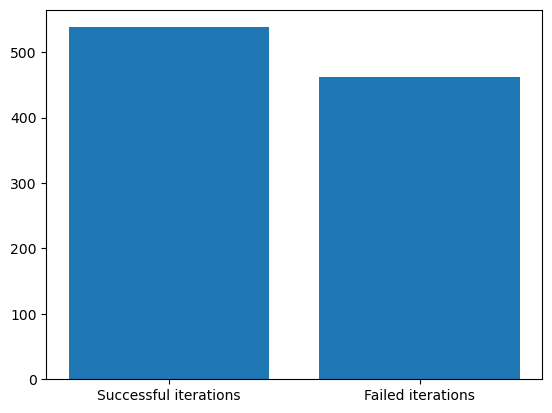

In [13]:
plt.bar(["Successful iterations", "Failed iterations"], experiments.Success.value_counts())

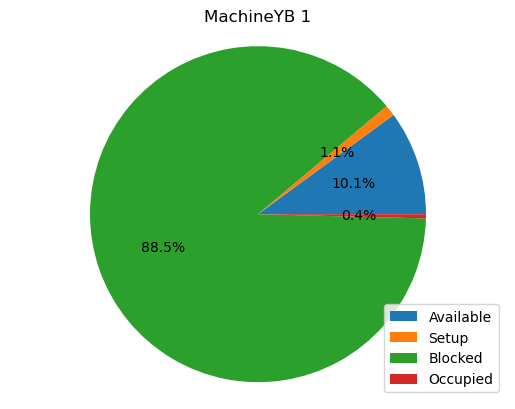

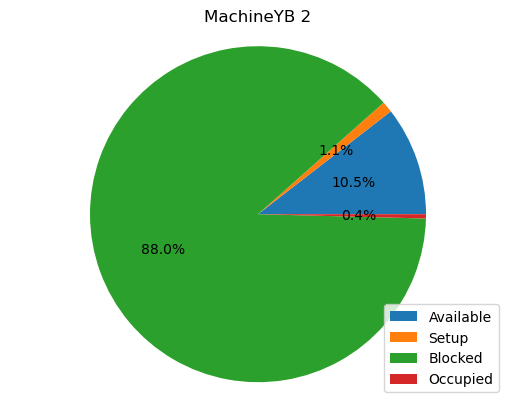

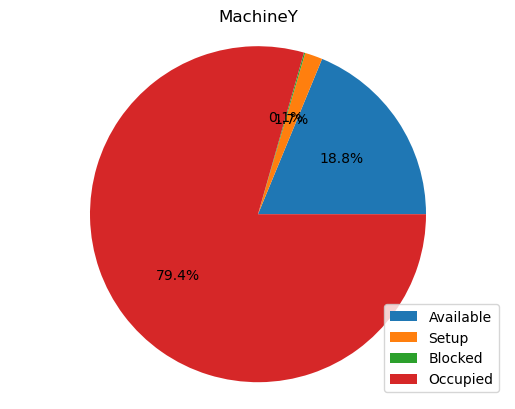

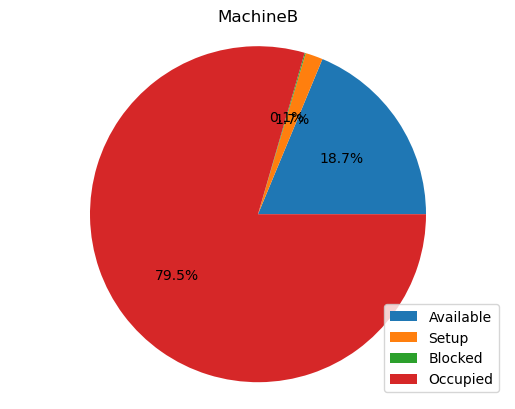

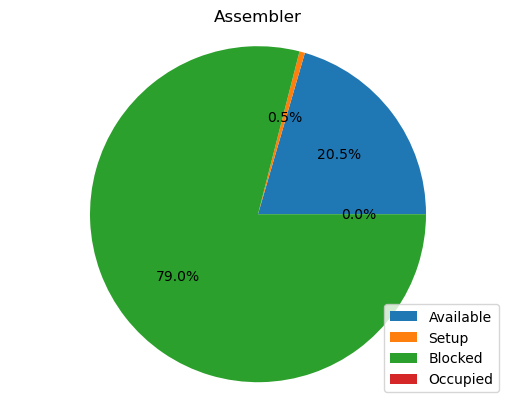

In [14]:
for stationName in stations.Name.unique().tolist():
    fig, ax = plt.subplots()

    current = stations[stations.Name == stationName].iloc[:, 1:]
    avg = [current.Available.mean(), current.Setup.mean(), current.Blocked.mean(), current.Occupied.mean()]
    ax.set_title(stationName)
    ax.pie(avg, labels=current.columns.to_list(), autopct='%1.1f%%', labeldistance=None)
    ax.axis('equal')
    plt.legend(loc="lower right")

    plt.show()

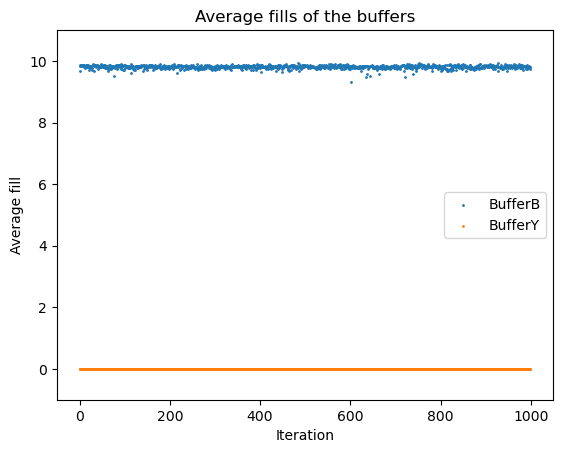

In [15]:
bufferNames = buffers.Name.unique().tolist()
for bufferName in bufferNames:
    #fig, ax = plt.subplots()

    current = buffers[buffers.Name == bufferName].iloc[:, 1:]
    current = current.reset_index(drop=True)
    #successful = current[experiments.Success]
    #unsuccessful = current[~experiments.Success]
    plt.scatter(current.index, current, s=1)
    #plt.scatter(successful.index, successful, color="green", s=1)
    #plt.scatter(unsuccessful.index, unsuccessful, color="red", s=1)
    plt.ylim(-1, 11)
    #ax.set_title(bufferName)

plt.title("Average fills of the buffers")
plt.ylabel("Average fill")
plt.xlabel("Iteration")
plt.legend(bufferNames)
plt.show()

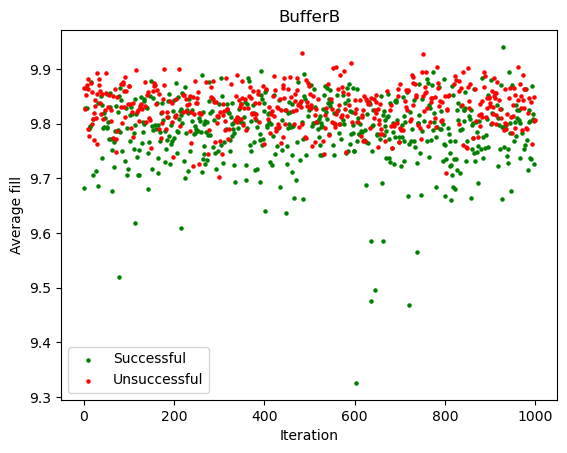

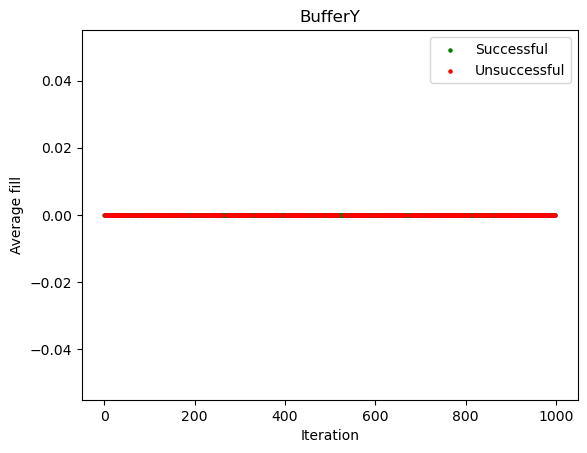

In [16]:
bufferNames = buffers.Name.unique().tolist()
for bufferName in bufferNames:
    fig, ax = plt.subplots()

    current = buffers[buffers.Name == bufferName].iloc[:, 1:]
    current = current.reset_index(drop=True)
    successful = current[experiments.Success]
    unsuccessful = current[~experiments.Success]
    ax.scatter(successful.index, successful, color="green", s=5)
    ax.scatter(unsuccessful.index, unsuccessful, color="red", s=5)
    ax.set_title(bufferName)
    plt.ylabel("Average fill")
    plt.xlabel("Iteration")
    plt.legend(["Successful", "Unsuccessful"])
    plt.show()

#plt.title("Average fills of the buffers")

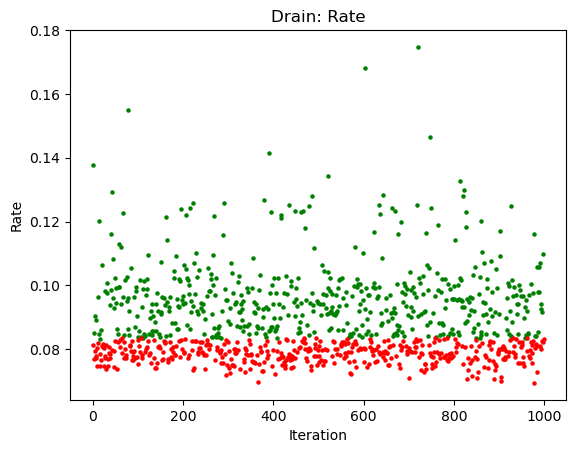

In [17]:
current = drains.iloc[:, 1:]
successful = current[experiments.Success]
unsuccessful = current[~experiments.Success]
#plt.scatter(current.index, current.Drainrate, s=1)
plt.scatter(successful.index, successful.Drainrate, color="green", s=5)
plt.scatter(unsuccessful.index, unsuccessful.Drainrate, color="red", s=5)
#plt.ylim(0, 1)
#ax.set_title(bufferName)

plt.title("Drain: Rate")
plt.ylabel("Rate")
plt.xlabel("Iteration")
plt.show()

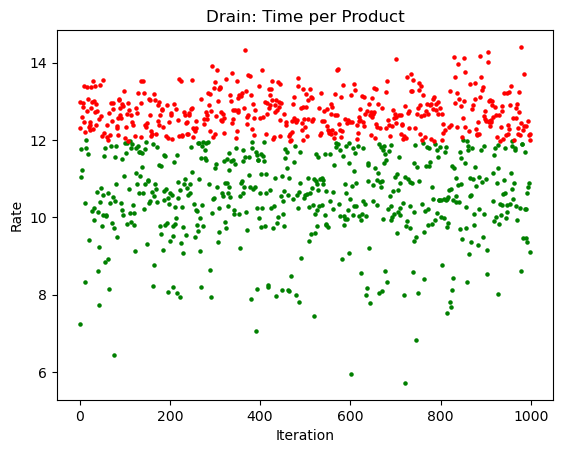

In [18]:
current = drains.iloc[:, 1:]
successful = current[experiments.Success]
unsuccessful = current[~experiments.Success]
#plt.scatter(current.index, current.Drainrate, s=1)
plt.scatter(successful.index, successful["Time per Product"], color="green", s=5)
plt.scatter(unsuccessful.index, unsuccessful["Time per Product"], color="red", s=5)
#plt.ylim(0, 1)
#ax.set_title(bufferName)

plt.title("Drain: Time per Product")
plt.ylabel("Rate")
plt.xlabel("Iteration")
plt.show()